In [53]:
## Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import requests

In [47]:
address = 'Vancouver, Canada'
geolocator = Nominatim(user_agent="anduleh2")
location = geolocator.geocode(address)
vancity_latitude = location.latitude
vancity_longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address,vancity_latitude, vancity_longitude))

The geograpical coordinate of Vancouver, Canada are 49.2608724, -123.1139529.


In [48]:
df = pd.read_csv('ftp://webftp.vancouver.ca/OpenData/csv/cov_localareas.csv')

In [418]:
new_data = pd.read_csv('ftp://webftp.vancouver.ca/opendata/csv/CensusLocalAreaProfiles2016.csv',encoding='ISO-8859-1')
new_data = new_data.iloc[3:]
new_data.columns = new_data.iloc[0]
new_data = new_data.iloc[1:]
new_data.dropna(inplace=True)
new_data = new_data[new_data['Variable'].str.contains("Average")]
new_data.drop('ID',axis=1,inplace=True)
new_data.set_index('Variable',drop=True,inplace=True)
new_data = new_data.T
new_data.index.name = None
new_data

TypeError: transpose() got an unexpected keyword argument 'inplace'

In [49]:
clean_df = df.rename({'NAME':'Neighbourhood'}, axis='columns').drop('MAPID',axis=1)
clean_df['Latitude'] = ''
clean_df['Longitude'] = ''
for i, row in clean_df.iterrows():
    address_iter = '{}, Vancouver, Canada'.format(row['Neighbourhood'])
    location = geolocator.geocode(address_iter)
    clean_df.at[i,'Latitude'] = location.latitude
    clean_df.at[i,'Longitude'] =location.longitude

In [ ]:
clean_df

In [13]:
map_vancouver = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(clean_df['Latitude'], clean_df['Longitude'], clean_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_vancouver)  
    
map_vancouver

In [14]:
# @hidden_cell
CLIENT_ID = 'QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P' # your Foursquare ID
CLIENT_SECRET = 'QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P
CLIENT_SECRET:QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ


### Lets check out the First Neighbourhood in the DataFrame

In [50]:
first_n = clean_df.loc[0].to_dict()
first_n_name = first_n['Neighbourhood']
first_n_lat = first_neighbourhood['Latitude']
first_n_lon = first_neighbourhood['Longitude']
print('The geograpical coordinate of {} are {}, {}.'.format(first_n['Neighbourhood'] + ', ' + address,first_n_lat, first_n_lon))

The geograpical coordinate of Sunset, Vancouver, Canada are 49.2633296, -123.0965885.


In [51]:
# FourSquare Query URL
LIMIT=100
radius=500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    first_n_lat, 
    first_n_lon, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=QGIGC40OIPFLAHA4SZRPLBFFNM1QXA4V2G2LQW5244VYY50P&client_secret=QSE3UMXWQFRONXR4SACUKZJ1HY3HMVYZM1IOT3B1EZXWN0YQ&v=20180605&ll=49.2633296,-123.0965885&radius=500&limit=100'

In [54]:
results = requests.get(url).json()
results["response"]['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '50f1dd8ee4b0ee8fd93bbfff',
   'name': 'Dude Chilling Park',
   'location': {'address': 'E 8th Ave',
    'crossStreet': 'at Guelph Park',
    'lat': 49.26372990146711,
    'lng': -123.09679627418517,
    'labeledLatLngs': [{'label': 'display',
      'lat': 49.26372990146711,
      'lng': -123.09679627418517}],
    'distance': 47,
    'cc': 'CA',
    'city': 'Vancouver',
    'state': 'BC',
    'country': 'Canada',
    'formattedAddress': ['E 8th Ave (at Guelph Park)',
     'Vancouver BC',
     'Canada']},
   'categories': [{'id': '52e81612bcbc57f1066b79ed',
     'name': 'Outdoor Sculpture',
     'pluralName': 'Outdoor Sculptures',
     'shortName': 'Outdoor Sculpture',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/sculpture_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'c

In [55]:
# venues within 500m of Kitusuru
for row in results["response"]['groups'][0]['items']:
    print(row['venue']['categories'][0]['name'])

Outdoor Sculpture
Sushi Restaurant
Tea Room
Bookstore
Burrito Place
Sushi Restaurant
Brewery
Coffee Shop
Brewery
Bagel Shop
Chinese Restaurant
Diner
Lounge
Donut Shop
Sushi Restaurant
Pizza Place
Taco Place
Music Venue
Indian Restaurant
Grocery Store
Coffee Shop
Vietnamese Restaurant
Bar
Clothing Store
Food Truck
Indian Restaurant
Arts & Crafts Store
Lounge
Board Shop
Thrift / Vintage Store
Pub
Coffee Shop
Breakfast Spot
Sandwich Place
Coffee Shop
New American Restaurant
Pool Hall
Peruvian Restaurant
Ethiopian Restaurant
Record Shop
Gastropub
Library
Diner
Noodle House
Breakfast Spot
Arts & Crafts Store
Breakfast Spot
Vietnamese Restaurant
Pharmacy
Mexican Restaurant
Sandwich Place
Gym
Bistro
Diner
Sports Bar
Coffee Shop
Coffee Shop
Bakery
Hotel
Sandwich Place
Restaurant
Tapas Restaurant
Liquor Store
Sandwich Place
Thrift / Vintage Store
Café
Thrift / Vintage Store


In [242]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# get nearby venues
vancouver_venues = getNearbyVenues(names=clean_df["Neighbourhood"], 
                                 latitudes=clean_df["Latitude"], 
                                 longitudes=clean_df["Longitude"])

In [61]:
map_vancity = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(vancouver_venues['Venue Latitude'], vancouver_venues['Venue Longitude'], vancouver_venues['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#00A86B',
        fill_opacity=0.7).add_to(map_vancity)  
    
map_vancity

In [154]:
# Importing clustering libraries
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [222]:
coords = vancouver_venues[['Venue Latitude', 'Venue Longitude','Venue Category']].values

In [180]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.neighbors import NearestNeighbors

In [181]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(coords)

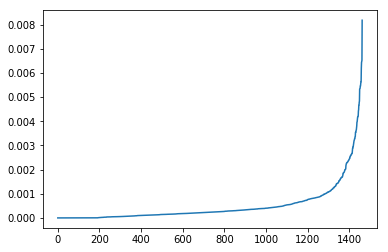

In [182]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [197]:
kms_per_radian = 15000
epsilon = 1.0 / kms_per_radian # Max distance points can be from each other
db = DBSCAN(eps=0.08, min_samples=4, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 1


In [198]:
# Add the clusters to the nairobi_restaurants dataframe
vancouver_venues["cluster"] = cluster_labels
vancouver_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                 Sunset              49.219593             -123.090239   
1                 Sunset              49.219593             -123.090239   
2                 Sunset              49.219593             -123.090239   
3                 Sunset              49.219593             -123.090239   
4                 Sunset              49.219593             -123.090239   
5                 Sunset              49.219593             -123.090239   
6                 Sunset              49.219593             -123.090239   
7                 Sunset              49.219593             -123.090239   
8                 Sunset              49.219593             -123.090239   
9                 Sunset              49.219593             -123.090239   
10                Sunset              49.219593             -123.090239   
11                Sunset              49.219593             -123.090239   
12                Sunset              49.219593             -123.090239   
13                Sunset              49.219593             -123.090239   
14                Sunset              49.219593             -123.090239   
15                Sunset              49.219593             -123.090239   
16                Sunset              49.219593             -123.090239   
17                Sunset              49.219593             -123.090239   
18                Sunset              49.219593             -123.090239   
19                Sunset              49.219593             -123.090239   
20                Sunset              49.219593             -123.090239   
21                Sunset              49.219593             -123.090239   
22                Sunset              49.219593             -123.090239   
23                Sunset              49.219593             -123.090239   
24                Sunset              49.219593             -123.090239   
25                Sunset              49.219593             -123.090239   
26                Sunset              49.219593             -123.090239   
27                Sunset              49.219593             -123.090239   
28                Sunset              49.219593             -123.090239   
29                Sunset              49.219593             -123.090239   
...                  ...                    ...                     ...   
1433  Grandview-Woodland              49.270559             -123.067942   
1434  Grandview-Woodland              49.270559             -123.067942   
1435  Grandview-Woodland              49.270559             -123.067942   
1436  Grandview-Woodland              49.270559             -123.067942   
1437  Grandview-Woodland              49.270559             -123.067942   
1438  Grandview-Woodland              49.270559             -123.067942   
1439  Grandview-Woodland              49.270559             -123.067942   
1440  Grandview-Woodland              49.270559             -123.067942   
1441  Grandview-Woodland              49.270559             -123.067942   
1442  Grandview-Woodland              49.270559             -123.067942   
1443  Grandview-Woodland              49.270559             -123.067942   
1444  Grandview-Woodland              49.270559             -123.067942   
1445  Grandview-Woodland              49.270559             -123.067942   
1446  Grandview-Woodland              49.270559             -123.067942   
1447  Grandview-Woodland              49.270559             -123.067942   
1448  Grandview-Woodland              49.270559             -123.067942   
1449  Grandview-Woodland              49.270559             -123.067942   
1450  Grandview-Woodland              49.270559             -123.067942   
1451  Grandview-Woodland              49.270559             -123.067942   
1452  Grandview-Woodland              49.270559             -123.067942   
1453  Grandview-Woodland              49.270559             -123.067942   
1454  Grandview-Woodland             

In [199]:
# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [200]:
map_vancity_clusters = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=11)

# add markers to map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_venues['Venue Latitude'], vancouver_venues['Venue Longitude'], vancouver_venues['Venue'], vancouver_venues['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_vancity_clusters)
       
map_vancity_clusters

In [223]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [224]:
coords.shape

(1463, 3)

In [244]:
vancouver_venues2 = vancouver_venues.drop(['Venue'],axis=1)

In [245]:
vancouver_venues3 = pd.get_dummies(vancouver_venues2)
vancouver_venues3

Neighborhood Latitude  Neighborhood Longitude  Venue Latitude  \
0                 49.219593             -123.090239       49.225172   
1                 49.219593             -123.090239       49.227019   
2                 49.219593             -123.090239       49.224861   
3                 49.219593             -123.090239       49.210968   
4                 49.219593             -123.090239       49.227635   
5                 49.219593             -123.090239       49.226324   
6                 49.219593             -123.090239       49.227302   
7                 49.219593             -123.090239       49.227979   
8                 49.219593             -123.090239       49.222767   
9                 49.219593             -123.090239       49.225731   
10                49.219593             -123.090239       49.228348   
11                49.219593             -123.090239       49.226925   
12                49.219593             -123.090239       49.224628   
13                49.219593             -123.090239       49.225203   
14                49.219593             -123.090239       49.226742   
15                49.219593             -123.090239       49.219135   
16                49.219593             -123.090239       49.210818   
17                49.219593             -123.090239       49.225664   
18                49.219593             -123.090239       49.218328   
19                49.219593             -123.090239       49.223925   
20                49.219593             -123.090239       49.224026   
21                49.219593             -123.090239       49.224046   
22                49.219593             -123.090239       49.223877   
23                49.219593             -123.090239       49.224791   
24                49.219593             -123.090239       49.224812   
25                49.219593             -123.090239       49.225271   
26                49.219593             -123.090239       49.225389   
27                49.219593             -123.090239       49.225441   
28                49.219593             -123.090239       49.225460   
29                49.219593             -123.090239       49.217006   
...                     ...                     ...             ...   
1433              49.270559             -123.067942       49.269280   
1434              49.270559             -123.067942       49.271543   
1435              49.270559             -123.067942       49.275667   
1436              49.270559             -123.067942       49.277690   
1437              49.270559             -123.067942       49.274963   
1438              49.270559             -123.067942       49.279134   
1439              49.270559             -123.067942       49.262290   
1440              49.270559             -123.067942       49.265189   
1441              49.270559             -123.067942       49.272623   
1442              49.270559             -123.067942       49.271009   
1443              49.270559             -123.067942       49.268329   
1444              49.270559             -123.067942       49.278659   
1445              49.270559             -123.067942       49.269048   
1446              49.270559             -123.067942       49.266911   
1447              49.270559             -123.067942       49.268090   
1448              49.270559             -123.067942       49.275398   
1449              49.270559             -123.067942       49.264412   
1450              49.270559             -123.067942       49.262880   
1451              49.270559             -123.067942       49.264949   
1452              49.270559             -123.067942       49.264484   
1453              49.270559             -123.067942       49.271490   
1454              49.270559             -123.067942       49.271559   
1455              49.270559             -123.067942       49.264304   
1456              49.270559             -123.067942       49.269665   
1457              49.270559   

In [250]:
kclusters = 22
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(vancouver_venues3)

# check cluster labels generated for each row in the dataframe
vancouver_venues['Cluster Labels'] = kmeans.labels_
vancouver_venues

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                 Sunset              49.219593             -123.090239   
1                 Sunset              49.219593             -123.090239   
2                 Sunset              49.219593             -123.090239   
3                 Sunset              49.219593             -123.090239   
4                 Sunset              49.219593             -123.090239   
5                 Sunset              49.219593             -123.090239   
6                 Sunset              49.219593             -123.090239   
7                 Sunset              49.219593             -123.090239   
8                 Sunset              49.219593             -123.090239   
9                 Sunset              49.219593             -123.090239   
10                Sunset              49.219593             -123.090239   
11                Sunset              49.219593             -123.090239   
12                Sunset              49.219593             -123.090239   
13                Sunset              49.219593             -123.090239   
14                Sunset              49.219593             -123.090239   
15                Sunset              49.219593             -123.090239   
16                Sunset              49.219593             -123.090239   
17                Sunset              49.219593             -123.090239   
18                Sunset              49.219593             -123.090239   
19                Sunset              49.219593             -123.090239   
20                Sunset              49.219593             -123.090239   
21                Sunset              49.219593             -123.090239   
22                Sunset              49.219593             -123.090239   
23                Sunset              49.219593             -123.090239   
24                Sunset              49.219593             -123.090239   
25                Sunset              49.219593             -123.090239   
26                Sunset              49.219593             -123.090239   
27                Sunset              49.219593             -123.090239   
28                Sunset              49.219593             -123.090239   
29                Sunset              49.219593             -123.090239   
...                  ...                    ...                     ...   
1433  Grandview-Woodland              49.270559             -123.067942   
1434  Grandview-Woodland              49.270559             -123.067942   
1435  Grandview-Woodland              49.270559             -123.067942   
1436  Grandview-Woodland              49.270559             -123.067942   
1437  Grandview-Woodland              49.270559             -123.067942   
1438  Grandview-Woodland              49.270559             -123.067942   
1439  Grandview-Woodland              49.270559             -123.067942   
1440  Grandview-Woodland              49.270559             -123.067942   
1441  Grandview-Woodland              49.270559             -123.067942   
1442  Grandview-Woodland              49.270559             -123.067942   
1443  Grandview-Woodland              49.270559             -123.067942   
1444  Grandview-Woodland              49.270559             -123.067942   
1445  Grandview-Woodland              49.270559             -123.067942   
1446  Grandview-Woodland              49.270559             -123.067942   
1447  Grandview-Woodland              49.270559             -123.067942   
1448  Grandview-Woodland              49.270559             -123.067942   
1449  Grandview-Woodland              49.270559             -123.067942   
1450  Grandview-Woodland              49.270559             -123.067942   
1451  Grandview-Woodland              49.270559             -123.067942   
1452  Grandview-Woodland              49.270559             -123.067942   
1453  Grandview-Woodland              49.270559             -123.067942   
1454  Grandview-Woodland             

In [251]:
import matplotlib.colors as colors

# create map
map_vancity_clusters2 = folium.Map(location=[vancity_latitude, vancity_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(vancouver_venues['Venue Latitude'], vancouver_venues['Venue Longitude'], vancouver_venues['Neighborhood'], vancouver_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        #popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_vancity_clusters2)
       
map_vancity_clusters2